In [206]:
import pandas as pd
import scipy.linalg as la
from scipy import stats
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import pearsonr

In [243]:
# dataset stuff
file_path = "output_without_cheaters_with_no_colors.csv"
file_path2 = "output_prelim_final.csv"
failed_trials_excluded = "output-failed-trials-excluded.csv"
excluding_outliers = "output-excluding-outliers.csv"
df = pd.read_csv(failed_trials_excluded)
#df2 = pd.read_csv(file_path2)
df = df.drop_duplicates()
V_data = df['vscore'] # csv file for visual test scores
A_data = df['ascore'] # csv file for auditory test scores
twin_data = df['twinscore'] # csv file for twin test scores
#df
#df2

In [244]:
# hedges' G to measure effect size


                  
mean1 = np.mean(V_data)
mean2 = np.mean(A_data)
std1 = np.std(V_data, ddof=1)  # Use ddof=1 for sample standard deviation
std2 = np.std(A_data, ddof=1)

                  
pooled_std = np.sqrt(((len(V_data) - 1) * std1**2 + (len(A_data) - 1) * std2**2) / (len(V_data) + len(A_data) - 2))

hedges_g = (mean1 - mean2) / pooled_std * (1 - (3 / (4 * (len(V_data) + len(A_data) - 2) - 1)))

print(hedges_g)


-0.01240970639018753


In [245]:
# paired t-test 


# Perform the paired t-test


t_statistic, p_value = stats.ttest_rel(V_data, A_data) # for real data




print("Paired t-test results for the real data:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Interprets the results of the real data
alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between before and after measurements.")
else:
    print("Fail to reject the null hypothesis.")


Paired t-test results for the real data:
t-statistic: -0.07070591686911248
p-value: 0.9444114632003549
Fail to reject the null hypothesis.


In [246]:
# illustration of how to plot the graph
# creates the variables needed to plot the beta parameter

 

# real data (visual score)
# defines the datasets (twin is used in auditory as well)
V_data = V_data[:, np.newaxis]
A_data = A_data[:, np.newaxis]
twin_data = twin_data[:, np.newaxis]


# makes the beta parameter
V_beta = la.inv(V_data.T @ V_data) @ V_data.T @ twin_data
V_y_hat = V_data @ V_beta

# real data (visual score)
# makes the beta parameter 
A_beta = la.inv(A_data.T @ A_data) @ A_data.T @ twin_data
A_y_hat = A_data @ A_beta



/var/folders/dv/3q31z61s6g5c1tt6n74cs_5h0000gn/T/ipykernel_2074/572497813.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  V_data = V_data[:, np.newaxis]
/var/folders/dv/3q31z61s6g5c1tt6n74cs_5h0000gn/T/ipykernel_2074/572497813.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  A_data = A_data[:, np.newaxis]
/var/folders/dv/3q31z61s6g5c1tt6n74cs_5h0000gn/T/ipykernel_2074/572497813.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  twin_data = twin_data[:, np.newaxis]


In [247]:
def mean_squared_error(actual, predicted):
    """
    Calculate the Mean Squared Error (MSE) between two lists of values.

    Parameters:
        actual (list): List of actual values.
        predicted (list): List of predicted values.

    Returns:
        float: The Mean Squared Error (MSE) between actual and predicted values.
    """
    # Ensure the input lists have the same length
    if len(actual) != len(predicted):
        raise ValueError("Input lists must have the same length")

    # Calculate the squared differences between actual and predicted values
    squared_errors = [(actual[i] - predicted[i]) ** 2 for i in range(len(actual))]

    # Calculate the mean of squared errors
    mse = sum(squared_errors) / len(actual)

    return mse

In [248]:
A = V_data.flatten()
B = A_data.flatten()
C = twin_data.flatten()

# Calculate pairwise correlations
r_AB, _ = pearsonr(A, B)
r_AC, _ = pearsonr(A, C)
r_BC, _ = pearsonr(B, C)

print(f"Correlation between Visual score and Auditory score: {r_AB:.2f}")
print(f"Correlation between Visual score and Twin score: {r_AC:.2f}")
print(f"Correlation between Auditory score and Twin score: {r_BC:.2f}")

Correlation between Visual score and Auditory score: 0.72
Correlation between Visual score and Twin score: 0.77
Correlation between Auditory score and Twin score: 0.43


/Users/jacobwamon/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


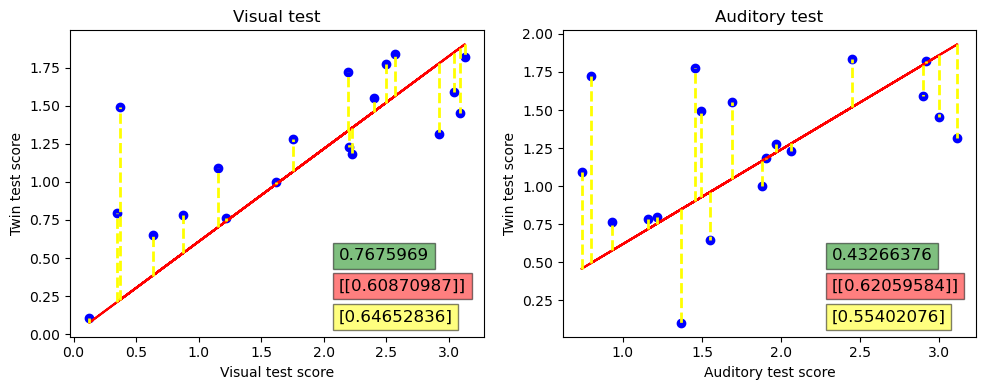

In [249]:
# Create your arrays for x and y coordinates

# Create the plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(V_data, twin_data, color='blue')
ax1.plot(V_data, V_y_hat, color='red')

# Add labels and title (optional)
ax1.set_xlabel('Visual test score')
ax1.set_ylabel('Twin test score')
ax1.set_title('Visual test')
ax1.text(0.65, 0.05, mean_squared_error(V_data, V_y_hat), transform=ax1.transAxes, fontsize=12,
         bbox=dict(facecolor='yellow', alpha=0.5)) 
ax1.text(0.65, 0.15, V_beta, transform=ax1.transAxes, fontsize=12,
         bbox=dict(facecolor='red', alpha=0.5)) 
ax1.text(0.65, 0.25, round(r_AC, 8), transform=ax1.transAxes, fontsize=12,
         bbox=dict(facecolor='green', alpha=0.5)) 

# Display the plot
y_hat = V_y_hat.flatten()
for i in range(twin_data.size):
    squared_error = (twin_data - V_y_hat) ** 2
    #plt.annotate(f'SE: {squared_error:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    ax1.plot((V_data[i], V_data[i]), (V_y_hat[i], twin_data[i]), linestyle='--', c='yellow', lw=2)
    
# Create your arrays for x and y coordinates

# labels each datapoint
'''labels = df['pid']
for i, label in enumerate(labels):
    ax1.text(V_data[i], twin_data[i], label, fontsize=12, ha='center', va='bottom')
'''

# displays the mse:
ax2.text(0.65, 0.05, mean_squared_error(A_data, A_y_hat), transform=ax2.transAxes, fontsize=12,
         bbox=dict(facecolor='yellow', alpha=0.5)) 
ax2.text(0.65, 0.15, A_beta, transform=ax2.transAxes, fontsize=12,
         bbox=dict(facecolor='red', alpha=0.5)) 
ax2.text(0.65, 0.25, round(r_BC, 8), transform=ax2.transAxes, fontsize=12,
         bbox=dict(facecolor='green', alpha=0.5)) 

# labels each data point 
'''for i, label in enumerate(labels):
    ax2.text(A_data[i], twin_data[i], label, fontsize=12, ha='center', va='bottom')
'''

# Create the plot for the auditory and twin score
ax2.scatter(A_data, twin_data, color='blue')
ax2.plot(A_data, A_y_hat, color='red')

# Add labels and title (optional)
ax2.set_xlabel('Auditory test score')
ax2.set_ylabel('Twin test score')
ax2.set_title('Auditory test')

# Display the plot
y_hat = A_y_hat.flatten()
for i in range(twin_data.size):
    squared_error = (twin_data - y_hat) ** 2
    plt.plot((A_data[i], A_data[i]), (A_y_hat[i], twin_data[i]), linestyle='--', c='yellow', lw=2)
    

# Add a legend
plt.tight_layout()

plt.show()

In [250]:
# Sample data
data1 = V_data

# Perform the Shapiro-Wilk test on V_data
stat, p = stats.shapiro(V_data)

# Check the p-value
alpha = 0.05
if p > alpha:
    print("Vision test data appears to be normally distributed at alpha = 0.05")
# Sample data (replace with your dataset)
data2 = A_data

# Perform the Shapiro-Wilk test on A_data
stat, p = stats.shapiro(data2)

# Check the p-value
alpha = 0.05
if p > alpha:
    print("Auditory test data appears to be normally distributed at alpha = 0.05")
# Sample data (replace with your dataset)
data3 = twin_data

# Perform the Shapiro-Wilk test on twin_data
stat, p = stats.shapiro(data3)

# Check the p-value
alpha = 0.05
if p > alpha:
    print("Twin test data appears to be normally distributed at alpha = 0.05")



Vision test data appears to be normally distributed at alpha = 0.05
Auditory test data appears to be normally distributed at alpha = 0.05
Twin test data appears to be normally distributed at alpha = 0.05


In [251]:
print(V_data.shape)
print(A_data.shape)
print(V_y_hat.shape)
print(A_y_hat.shape)
V_mse = mean_squared_error(V_data, V_y_hat)
A_mse = mean_squared_error(A_data, A_y_hat)
print(V_mse)
print(A_mse)

(19, 1)
(19, 1)
(19, 1)
(19, 1)
[0.64652836]
[0.55402076]


In [252]:
print(abs(V_mse - A_mse))

[0.0925076]


In [253]:
df

,pid,vscore,ascore,twinscore
0,P001,1.216340,0.932244,0.764488
1,P002,3.127669,2.913508,1.823312
2,P003,2.203268,2.063399,1.229630
3,P004,2.565142,2.447930,1.836819
4,P005,1.619608,1.876688,1.000436
5,P007,2.920479,3.113072,1.314597
6,P008,0.366885,1.493246,1.493682
7,P010,0.874510,1.155773,0.784532
8,P011,0.631373,1.553159,0.649455
9,P012,1.756427,1.969499,1.280174
